In [1]:
!pip install tweepy==4.10.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip show tweepy

Name: tweepy
Version: 4.10.1
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, oauthlib, requests-oauthlib
Required-by: 


In [3]:
import os
import tweepy as twep
import pandas as pd

In [4]:
#keys to access the twitter API
consumer_key= 'Y3RJeJFRHnA9QnpZu8z9S0Skb'
consumer_secret= 'mSHz1KdYkTNmYWuxMwX4fMzzGc9qv1OqgyQxWU26pheoGRcLuE'
access_token= '1287803472805367808-EedGVpYxgeXKILni2gt9HvJacgsmxx'
access_token_secret= 'K9jXNXr6i72odGz9XAiUnN5841eIUiDKcrj52RozRO743'

In [5]:
#Code to access the api and authentication to connect to twitter API
auth = twep.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = twep.API(auth, wait_on_rate_limit=True)

In [7]:
#code to search the Tweets with keyword tesla and add them to a text file
keyword = 'Tesla'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'w', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [8]:
#code to search the Tweets with keyword #TSLA and add them to a text file
keyword = '#TSLA'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [9]:
#code to search the Tweets with keyword yahoofinance and Tesla and add them to a text file
keyword = 'yahoofinance and Tesla'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [10]:
#opening file to write the processed text
file = open('processed.txt', 'w', encoding="utf-8")

In [11]:
#preprocessing
import re
with open('twitter.txt','r', encoding="utf-8") as f:
    lines = f.readlines()
f.close()
for line in lines:
    content=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", line).split())
    file.write(content+'.'+'\n')
file.close()

In [12]:
#Converting the input file into the list of sentences. 
Input = open("processed.txt", "r")
data = Input.read()
data_to_list = data.split("\n")
Input.close()

In [13]:
#Adding the input text that needs to be classified to the TEST variable
Test_X=[]
for x in data_to_list:
    Test_X.append(x)
Test_X

['Alright Elon just buy Blackberry and set the plan forth for the Tesla phone.',
 'Bro We choose because we prefer him Simple It has nothing to do with whoever has done it before bro We just like better So simple as it is.',
 'Hi how are you Can you give me one Tesla car J Berger Lockyer.',
 'RT Elon tweeted out a meme featuring a known symbol of antisemitism amp white supremacists Per ADL it is widely circulated amon.',
 'Muz.',
 'Apple must come clean or tesla would cream it.',
 'Lol Like he s put other EV companies out of business.',
 'RT tesla tanking because elon keeps focusing on other projects.',
 '.',
 'ELON I will make a phone just for racists.',
 'What happens if you try to change the wheel config on the car under service.',
 'RT Map of Tesla charging stations 1437 AD.',
 'RT com Tesla Opens Largest Delivery Center in Denmark to Meet Growing Local Demand.',
 '.',
 '.',
 'RT Era previsible La mente febril de Elon Musk les dijo no Apple amenaza con dejar fuera a Twitter y Musk 

In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
#removing the stopwords and peroforming the lemmatization and appending back.
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
Test_data=[]
for x in Test_X:
    tokens = word_tokenize(str(x))
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    Test_data.append(' '.join(finalwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Removing duplicate and single word sentences.
Test_X=[]
for x in Test_data:
    if len(x)>10:
        Test_X.append(x)
Test_X = [*set(Test_X)]

In the below 2 cells\, read the input from 2 different sets that are related to the stock sentiment to train the model.

In [17]:
twit = pd.read_csv("/content/all-data.csv", encoding = "latin-1")
Train_Y=twit["Sentiment"]
Train_X=twit["Text"]

In [18]:
twit = pd.read_csv("/content/stock_data.csv", encoding = "latin-1")
for ind in twit.index:
    if(twit['Sentiment'][ind]==-1):
        twit['Sentiment'][ind]="negative"
    else:
        twit['Sentiment'][ind]="positive"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
Train_X=Train_X.append(twit["Text"])
Train_Y=Train_Y.append(twit["Sentiment"])

In [20]:
Train_X.shape

(10637,)

In [21]:
#cleaned the train data by removing the stop words and doing the lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
Train_data=[]
for x in Train_X:
    tokens = word_tokenize(str(x))
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    Train_data.append(' '.join(finalwords))
Train_X= Train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#converted the list to Pandas data frame for analysis
df = pd.DataFrame(list(zip(Train_X, Train_Y)),
               columns =['Text', 'Sentiment'])

In [23]:
#created the wordcloud method to display the words with the sentiment values
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

def DisplayWordCloud(input,bcol):
    plt.figure(figsize=(10,10))
    wocl=WordCloud(background_color=bcol,max_words=50, min_word_length=2, contour_width=1, contour_color='orange')
    wocl.generate(" ".join(input)) 
    plt.imshow(wocl)
    plt.axis("off")

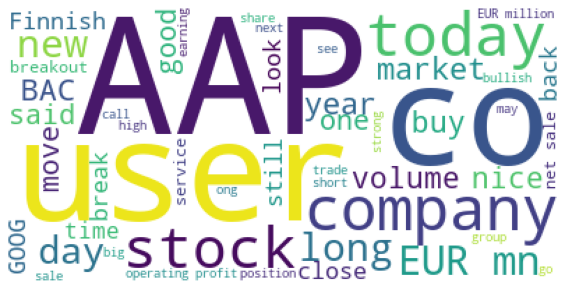

In [24]:
DisplayWordCloud(df[df.Sentiment=="positive"].Text, 'white')

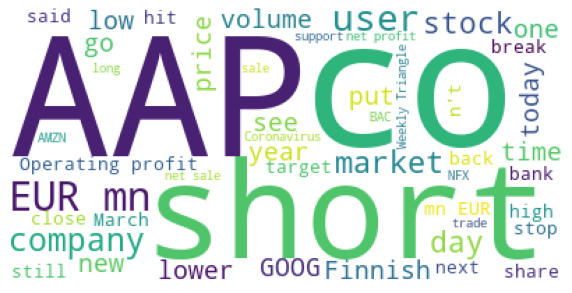

In [25]:
DisplayWordCloud(df[df.Sentiment=="negative"].Text, 'white')

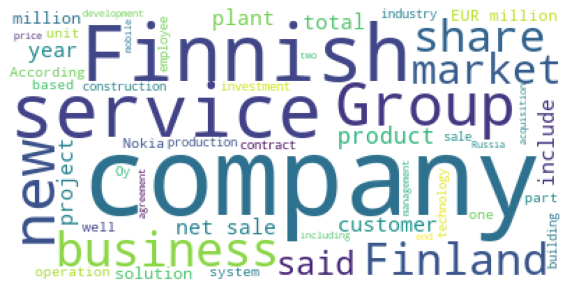

In [26]:
DisplayWordCloud(df[df.Sentiment=="neutral"].Text, 'white')

In [27]:
#creating a pipeline withe Tf-IDF vector and multinomailNaive bayes classifier as we have positive, negative and Neutral sentiment.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [28]:
#model is trained using FIt method
model.fit(Train_X, Train_Y)
labels = model.predict(Test_X)

In [29]:
#lables for the input are counted based on the sentiment
Final_lables=labels.tolist()
pcount=Final_lables.count("positive")
ncount=Final_lables.count("negative")
necount=Final_lables.count("neutral")
pcount,ncount,necount

(1781, 79, 61)

Building a sentiment model to pass the above labelled twitter data to predict the sentiment of the tweets and then deciding the stock direction where it is bearish or bullish based on the predicted tweets. Also comparing the above labels with the predicted sentiment in the below model gives the accuracy of the model.

In [30]:
import nltk
from nltk.classify import NaiveBayesClassifier 
import numpy as np
from nltk.corpus import stopwords 
import nltk.classify.util
from nltk.corpus import wordnet 
import pandas as pd
from nltk.corpus import twitter_samples 


In [31]:
#nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
train_df = pd.read_csv("stock_twitter.csv",encoding='latin-1',sep=',')

In [33]:
train_df.head(2)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,positive
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,positive


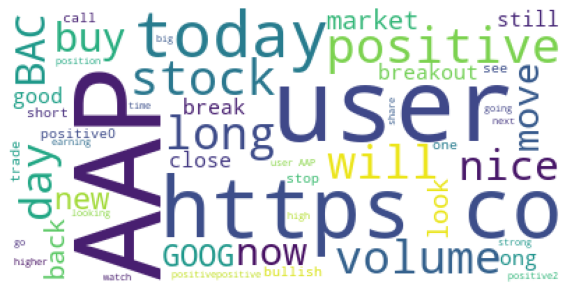

In [34]:
DisplayWordCloud(train_df[train_df.Sentiment=="positive"].Text, 'white')

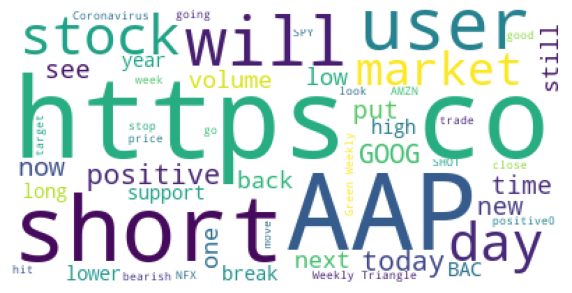

In [35]:
DisplayWordCloud(train_df[train_df.Sentiment=="negative"].Text, 'white')

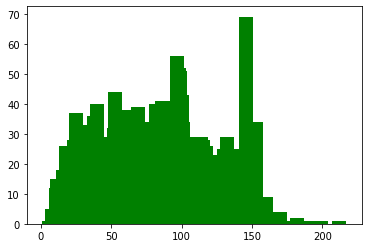

In [36]:
positive_tweets = train_df.loc[train_df['Sentiment']=='positive']
positive_tweets['Text']
#frequency of length of sentences in the positive text of dataset
from collections import OrderedDict
freq = {}
for line in positive_tweets['Text']:
  l=len(line)
  if (l in freq):
    freq[l] += 1
  else:
    freq[l] = 1
final_dict = OrderedDict(sorted(freq.items()))
plt.bar(final_dict.keys(), final_dict.values(), 10, color='g')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


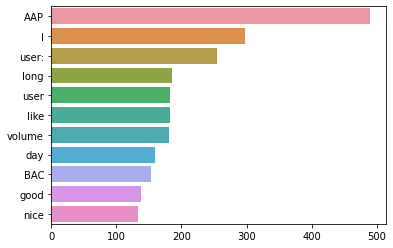

In [37]:
from scipy.stats.morestats import special
#most common words in the positive dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stop=set(stopwords.words('english'))
Input_str=[]
for line in positive_tweets['Text']:
    word_list= line.split()
    for word in word_list:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
symbols = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stop):
      if(word not in symbols):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

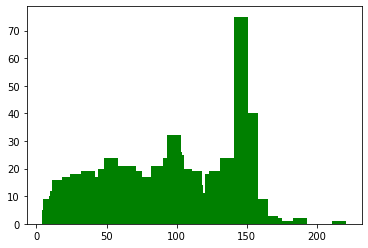

In [38]:
negative_tweets = train_df.loc[train_df['Sentiment']=='negative']
negative_tweets['Text']
#frequency of length of sentences in the negative text of dataset
from collections import OrderedDict
freq = {}
for line in negative_tweets['Text']:
  l=len(line)
  if (l in freq):
    freq[l] += 1
  else:
    freq[l] = 1
final_dict = OrderedDict(sorted(freq.items()))
plt.bar(final_dict.keys(), final_dict.values(), 10, color='g')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


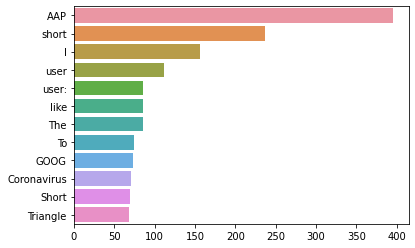

In [39]:
from scipy.stats.morestats import special
#most common words in the negative dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stop=set(stopwords.words('english'))
Input_str=[]
for line in negative_tweets['Text']:
    word_list= line.split()
    for word in word_list:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
symbols = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stop):
      if(word not in symbols):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [48]:
import re
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string

In [40]:
#Dataset preprocessing
def Preprocess(input):
  
  # removing the links
  input = re.sub(r'https?:\/\/.*[\r\n]*', '', input)

  # removing symbol
  input = re.sub(r'#', '', input)

  input_tweet_tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tokens_tweet = input_tweet_tokenizer.tokenize(input)

  return tokens_tweet

In [41]:
#getting the frequency of each word along with label
def tweet_frequency(input, label):
  word_frequency ={}
  label_list = np.squeeze(label).tolist()

  for lable, input_tweet in zip(label_list, input):
    for word in Preprocess(input_tweet):
      word_label_combo = (word, lable)
      if word_label_combo in word_frequency:
        word_frequency[word_label_combo] +=1
      else:
        word_frequency[word_label_combo] = 1
  
  return word_frequency

In [42]:
def get_frequency(freq, label, word):
  n = 0
  if(label=="positive"):
    x=1
  else:
    x=0
  input = (word, x)
  if input in freq:
    n = freq[input]
  return n 

In [43]:
# Train and Test data split 
train_positive = positive_tweets.sample(frac=0.8, random_state=25)
test_positive = positive_tweets.drop(train_positive.index)

train_negative = negative_tweets.sample(frac=0.8, random_state=25)
test_negative = negative_tweets.drop(train_negative.index)

TRAIN_X = train_positive.append(train_negative)
TEST_X = test_positive.append(test_negative)

#Changing labels to numpy array
train_y_positive=np.ones((len(train_positive)))
train_y_negative=np.zeros((len(train_negative)))
test_y_positive=np.ones((len(test_positive)))
test_y_negative=np.zeros((len(test_negative)))
TRAIN_Y = np.append(train_y_positive,train_y_negative)
TEST_Y = np.append(test_y_positive,test_y_negative)

In [44]:
# Build a dictionary of frequency
frequency = tweet_frequency(TRAIN_X["Text"], TRAIN_Y)

def modeltraining_NLP(frequency, TRAIN_X, TRAIN_Y):
  word_probability = {}

  vocabulary = set([x[0] for x in frequency.keys()])


  positive_count = Negative_count = 0
  for x in frequency.keys():
    if x[1]>0:
      positive_count += frequency[x]
    else:
      Negative_count += frequency[x]


  # positive tweet count
  p_list=0
  for x in TRAIN_Y:
    if x>0:
      p_list=p_list+1
  Positive_label_len = p_list

  # negative tweet count
  n_list=0
  for x in TRAIN_Y:
    if x<=0:
      n_list=n_list+1
  Negative_label_len = n_list


  for word in vocabulary:
    positive_frequency = get_frequency(frequency,"positive", word)
    negative_frequency = get_frequency(frequency,"negative", word)

    # probability of postive and negative class for each word
    word_positive = (positive_frequency+1)/(positive_count+len(vocabulary))
    word_negative = (negative_frequency+1)/(Negative_count+len(vocabulary))

    word_probability[word] = np.log(word_positive/word_negative)
    prior_probability = np.log(Positive_label_len) - np.log(Negative_label_len)

  
  return prior_probability, word_probability

In [45]:
prior_probability, word_probability=modeltraining_NLP(frequency, TRAIN_X, TRAIN_Y)
print(prior_probability)
print(len(word_probability))

0.5593614105227651
9256


In [46]:
def naive_bayes_predict(tweet, prior_probability, word_probability):
  wordlist = Preprocess(tweet)
  final_lable = 0
  final_lable+=prior_probability

  for word in wordlist:
    if word in word_probability:
      final_lable+=word_probability[word]

  return final_lable

Accuracy of model:51.075268817204304 %


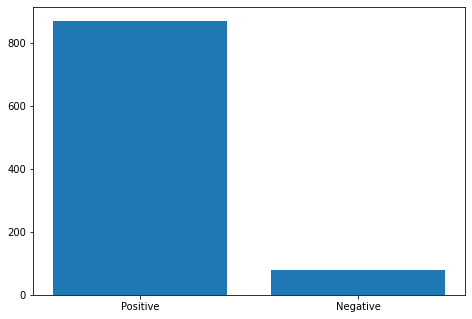

In [47]:
tweets=Test_X
po=0
n=0
lable_list=labels.tolist()
pcount=lable_list.count("positive")
ncount=lable_list.count("negative")
for tweet,label  in zip(tweets,labels):
  p=naive_bayes_predict(tweet,prior_probability,word_probability)
  if(p>1):
    if(label=="positive"):
      po=po+1
  else:
    if(label=="negative"):
      n=n+1
Accuracy= ((n+po)/(pcount+ncount)) * 100
print("Accuracy of model:"+str(Accuracy)+" %")
#plotted a bar chart for the lables that are predicted for the input.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiment = ['Positive', 'Negative']
Count = [po,n]
ax.bar(Sentiment,Count)
plt.show()